# LSTM Model

In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error ,r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-02-16 12:08:20.822322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 12:08:20.956044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 12:08:20.956071: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 12:08:21.647734: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Load and PreProcess 

In [3]:
data = pd.read_csv('data/PMS_data.csv',nrows=500000)

In [4]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [5]:
new_set = data[['Flow','Occupy']].copy()

In [6]:
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [7]:
new_set['Flow'] = np.around(new_set['Flow'])
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [8]:
new_set_plot = new_set.values

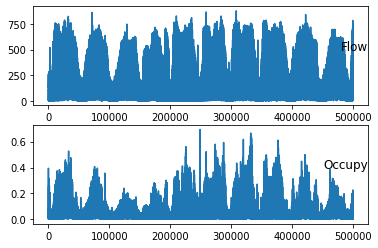

In [9]:
groups = [0, 1]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(new_set_plot[:, group])
    plt.title(new_set.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()

In [12]:
new_set = scaler.fit_transform(new_set)

In [13]:
new_set

array([[-0.62465384, -0.00291211],
       [-0.08209813, -0.03764191],
       [-0.68806945, -0.6106835 ],
       ...,
       [-0.54714589, -0.48664852],
       [-0.1243752 , -0.30059606],
       [-0.20892934, -0.44943803]])

In [14]:
x = new_set[:,1]

y = new_set[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [15]:
x_train = x_train.reshape(-1,1)
x_train.shape

(375000, 1)

In [16]:
x_test = x_test.reshape(-1,1)
x_test.shape

(125000, 1)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM ,Dense , Dropout
import tensorflow as tf

model = Sequential()
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1])))
model.add(LSTM(50,return_sequences = False,activation="relu"))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))


In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10.0)
])

In [ ]:
tf.keras.backend.clear_session()
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_test, y_test), shuffle=False)
     

Epoch 1/50
7500/7500 [==============================] - 31s 4ms/step - loss: 0.3632 - val_loss: 0.3579
Epoch 2/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3591 - val_loss: 0.3575
Epoch 3/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3587 - val_loss: 0.3574
Epoch 4/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3586 - val_loss: 0.3573
Epoch 5/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3585 - val_loss: 0.3573
Epoch 6/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3585 - val_loss: 0.3572
Epoch 7/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3584 - val_loss: 0.3572
Epoch 8/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3584 - val_loss: 0.3571
Epoch 9/50
7500/7500 [==============================] - 27s 4ms/step - loss: 0.3584 - val_loss: 0.3571
Epoch 10/50
7500/7500 [==============================] - 27s 4ms/step - l

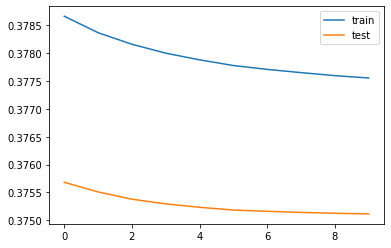

In [103]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [105]:
# make a prediction
y_pred = model.predict(x_test)


782/782 [==============================] - 2s 2ms/step


In [106]:
y_pred.shape

(25000, 1)

In [107]:
mse = sqrt(mean_squared_error(y_test, y_pred))

In [108]:
#y_pred = scaler.inverse_transform(y_pred)
print(mse)



0.6124656022722887


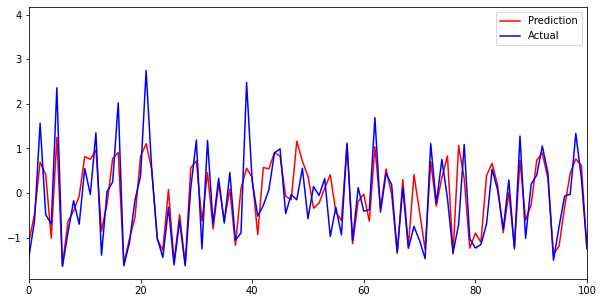

In [109]:
plt.figure(figsize=(10,5))
plt.plot(y_pred,color = 'red',label = 'Prediction')
plt.plot(y_test,color = 'blue',label = 'Actual')
plt.legend()
plt.xlim(0,100)
plt.show()

In [110]:
r2s = r2_score(y_true=y_test,y_pred=y_pred)

In [111]:
r2s

0.6270721336911129